In [1]:
import sys
#!{sys.executable} -m pip install tensorflow

In [2]:
# -*- coding: UTF-8 -*-
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas

In [3]:
X = pandas.read_json("..\\jsons\\Data_X.json", lines = True)
Y = pandas.read_json("..\\jsons\\Data_Y.json", lines = True)

In [4]:
X = X.astype({"country":'float', "city":'float', "institution": 'float'}) 

Y['connected'] = Y['connected'].astype(float)

In [5]:
X.head()

,country,city,institution,hIndex,numCits,numDocs,numCoAuthors,jaccardCoef,areas
0,1.0,1.0,1.0,0.33333,0.04117,0.45714,0.63043,0.03704,0.68421
1,1.0,1.0,1.0,0.00000,0.00000,0.00952,0.02174,0.01869,0.05882
2,1.0,1.0,0.0,0.91667,0.44352,0.47945,0.57741,0.03371,0.71429
3,1.0,0.0,0.0,0.29167,0.04411,0.48571,0.57246,0.04516,0.63158
4,1.0,0.0,0.0,0.00000,0.00000,0.00952,0.05072,0.03738,0.23529


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5)

In [7]:
print(len(Y),len(Y_train),len(Y_val),len(Y_test))

294954 235963 29496 29495


In [8]:
model = keras.Sequential([
	keras.Input(shape = (9)),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(24, activation='sigmoid'),
	keras.layers.Dense(16, activation='sigmoid'),
	keras.layers.Dense(8, activation='sigmoid'),
	keras.layers.Dense(4, activation='sigmoid'),
	keras.layers.Dense(1)
])

model.compile(optimizer='adam',
	loss = keras.losses.BinaryCrossentropy(from_logits=True),
	metrics = ['accuracy'])

In [9]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [10]:
history = model.fit(X_test.to_numpy(), Y_test.to_numpy(), epochs=1000, batch_size=256, shuffle = True, validation_data = (X_val.to_numpy(), Y_val.to_numpy()))

Epoch 1/1000
116/116 [==============================] - 3s 10ms/step - loss: 0.7474 - accuracy: 0.5016 - val_loss: 0.7044 - val_accuracy: 0.4984
Epoch 2/1000
116/116 [==============================] - 1s 6ms/step - loss: 0.6973 - accuracy: 0.5032 - val_loss: 0.6935 - val_accuracy: 0.4984
Epoch 3/1000
116/116 [==============================] - 1s 6ms/step - loss: 0.6932 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 4/1000
116/116 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6932 - val_accuracy: 0.4984
Epoch 5/1000
116/116 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5032 - val_loss: 0.6931 - val_accuracy: 0.4984
Epoch 6/1000
116/116 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.5032 - val_loss: 0.6930 - val_accuracy: 0.4984
Epoch 7/1000
116/116 [==============================] - 1s 7ms/step - loss: 0.6927 - accuracy: 0.5032 - val_loss: 0.6924 - val_accuracy

In [14]:
model.evaluate(X_test.to_numpy(), Y_test.to_numpy(), batch_size=256)

116/116 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.8593


[0.3088434338569641, 0.8593320846557617]

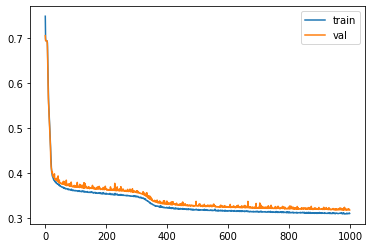

In [15]:
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

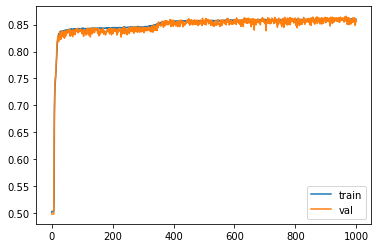

In [16]:
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()